<a href="https://colab.research.google.com/github/maxmaxine825/MSSP607/blob/main/MSSP607_case_study_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.iolib.summary2 import summary_col
from scipy.stats import ttest_ind

**Dataset Overview**

In [ ]:
!git clone https://github.com/maxmaxine825/MSSP607.git
%cd MSSP607

Cloning into 'MSSP607'...
remote: Enumerating objects: 137, done.
remote: Counting objects: 100% (137/137), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 137 (delta 75), reused 36 (delta 18), pack-reused 0 (from 0)
Receiving objects: 100% (137/137), 3.13 MiB | 11.40 MiB/s, done.
Resolving deltas: 100% (75/75), done.
/content/MSSP607/MSSP607


In [ ]:
df = pd.read_excel("data/data_academic_performance.xlsx")
print(f"Dataset loaded successfully!")
print(f"Dataset shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(df.info())

Dataset loaded successfully!
Dataset shape: 12411 rows × 45 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12411 entries, 0 to 12410
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   COD_S11           12411 non-null  object 
 1   GENDER            12411 non-null  object 
 2   EDU_FATHER        12411 non-null  object 
 3   EDU_MOTHER        12411 non-null  object 
 4   OCC_FATHER        12411 non-null  object 
 5   OCC_MOTHER        12411 non-null  object 
 6   STRATUM           12411 non-null  object 
 7   SISBEN            12411 non-null  object 
 8   PEOPLE_HOUSE      12411 non-null  object 
 9   Unnamed: 9        0 non-null      float64
 10  INTERNET          12411 non-null  object 
 11  TV                12411 non-null  object 
 12  COMPUTER          12411 non-null  object 
 13  WASHING_MCH       12411 non-null  object 
 14  MIC_OVEN          12411 non-null  object 
 15  CAR               1

In [ ]:
df.head()

,COD_S11,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,Unnamed: 9,...,CC_PRO,ENG_PRO,WC_PRO,FEP_PRO,G_SC,PERCENTILE,2ND_DECILE,QUARTILE,SEL,SEL_IHE
0,SB11201210000129,F,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,Stratum 4,It is not classified by the SISBEN,Three,NaN,...,71,93,79,181,180,91,5,4,2,2
1,SB11201210000137,F,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,Stratum 5,It is not classified by the SISBEN,Three,NaN,...,86,98,78,201,182,92,5,4,4,4
2,SB11201210005154,M,Not sure,Not sure,Independent,Home,Stratum 2,Level 2,Five,NaN,...,18,43,22,113,113,7,1,1,1,1
3,SB11201210007504,F,Not sure,Not sure,Other occupation,Independent,Stratum 2,It is not classified by the SISBEN,Three,NaN,...,76,80,48,137,157,67,4,3,2,2
4,SB11201210007548,M,Complete professional education,Complete professional education,Executive,Home,Stratum 4,It is not classified by the SISBEN,One,NaN,...,98,100,71,189,198,98,5,4,4,2


**Calculation of Average Score Variables**

In [ ]:
s11_vars = ['MAT_S11', 'CR_S11', 'CC_S11', 'BIO_S11', 'ENG_S11']
pro_vars = ['QR_PRO', 'CR_PRO', 'CC_PRO', 'ENG_PRO', 'WC_PRO']

df["S11_AVG"] = df[s11_vars].mean(axis=1)
df["PRO_AVG"] = df[pro_vars].mean(axis=1)

**Does parental education influence outcomes, and if so, how much?**

In [ ]:
df = df.query("EDU_FATHER != 0 and EDU_MOTHER != 0 and EDU_FATHER != 'Ninguno' and EDU_MOTHER != 'Ninguno'").copy()

edu_map = {
    "Incomplete primary": 1,
    "Complete primary": 2,
    "Incomplete Secundary": 3,
    "Complete Secundary": 4,
    "Incomplete technical or technology": 5,
    "Complete technique or technology": 6,
    "Incomplete Professional": 7,
    "Complete professional": 8,
    "Postgraduate education": 9,
    "Not sure": np.nan
}

df["EDU_FATHER_NUM"] = df["EDU_FATHER"].map(edu_map)
df["EDU_MOTHER_NUM"] = df["EDU_MOTHER"].map(edu_map)

X1 = df[["EDU_FATHER_NUM", "EDU_MOTHER_NUM"]]
X1 = sm.add_constant(X1)
y1 = df["S11_AVG"]
model_s11 = sm.OLS(y1, X1, missing='drop').fit()

X2 = df[["EDU_FATHER_NUM", "EDU_MOTHER_NUM"]]
X2 = sm.add_constant(X2)
y2 = df["PRO_AVG"]
model_pro = sm.OLS(y2, X2, missing='drop').fit()

print(" "*35 + "model s11" + " "*35)
print(model_s11.summary())
print("\n")
print(" "*35 + "model pro" + " "*35)
print(model_pro.summary())

                                   model s11                                   
                            OLS Regression Results                            
Dep. Variable:                S11_AVG   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     361.2
Date:                Tue, 14 Oct 2025   Prob (F-statistic):          6.35e-146
Time:                        02:08:00   Log-Likelihood:                -15793.
No. Observations:                4380   AIC:                         3.159e+04
Df Residuals:                    4377   BIC:                         3.161e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

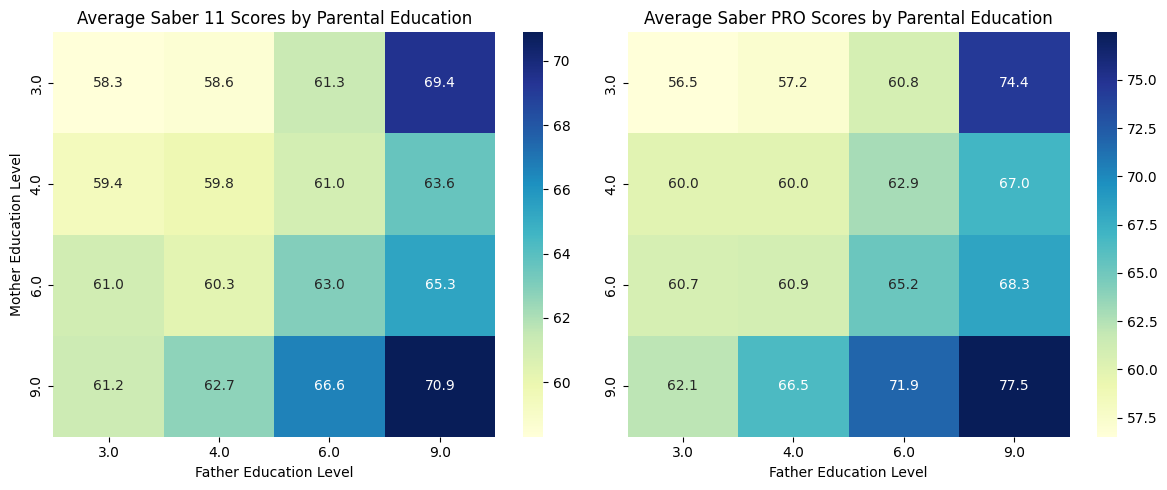

In [ ]:
heat_data_s11 = df.pivot_table(values='S11_AVG', index='EDU_MOTHER_NUM', columns='EDU_FATHER_NUM', aggfunc='mean')
heat_data_pro = df.pivot_table(values='PRO_AVG', index='EDU_MOTHER_NUM', columns='EDU_FATHER_NUM', aggfunc='mean')

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(heat_data_s11, cmap="YlGnBu", annot=True, fmt=".1f", ax=axes[0])
axes[0].set_title("Average Saber 11 Scores by Parental Education")
axes[0].set_xlabel("Father Education Level")
axes[0].set_ylabel("Mother Education Level")

sns.heatmap(heat_data_pro, cmap="YlGnBu", annot=True, fmt=".1f", ax=axes[1])
axes[1].set_title("Average Saber PRO Scores by Parental Education")
axes[1].set_xlabel("Father Education Level")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

**Which groups/stratum performs best? Are there differences between groups/stratums? Explain your analysis.**

In [ ]:
print(df.groupby("SEL")[["S11_AVG", "PRO_AVG"]].mean().round(2))

     S11_AVG  PRO_AVG
SEL                  
1      59.20    57.74
2      60.59    60.93
3      61.86    64.05
4      66.58    71.41


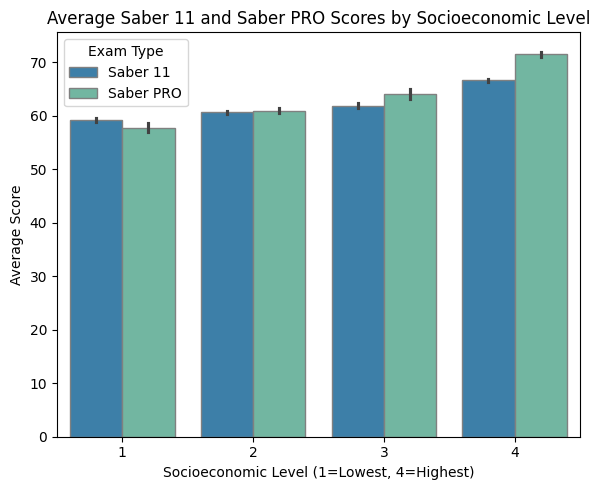

In [ ]:
df_plot = pd.concat([
    df[["SEL", "S11_AVG"]].rename(columns={"S11_AVG": "Score"}).assign(Exam="Saber 11"),
    df[["SEL", "PRO_AVG"]].rename(columns={"PRO_AVG": "Score"}).assign(Exam="Saber PRO")
])

plt.figure(figsize=(6,5))
sns.barplot(
    x="SEL",
    y="Score",
    hue="Exam",
    data=df_plot,
    palette=["#2b83ba", "#66c2a5"],
    errorbar=("ci", 95),
    edgecolor="gray"
)

plt.title("Average Saber 11 and Saber PRO Scores by Socioeconomic Level")
plt.xlabel("Socioeconomic Level (1=Lowest, 4=Highest)")
plt.ylabel("Average Score")
plt.legend(title="Exam Type")
plt.tight_layout()
plt.show()

In [ ]:
model_s11 = smf.ols("S11_AVG ~ C(SEL)", data=df).fit()
anova_s11 = anova_lm(model_s11, typ=2)
print("="*20 + "Saber 11 ANOVA" + "="*20)
print(anova_s11)

print("\n")

model_pro = smf.ols("PRO_AVG ~ C(SEL)", data=df).fit()
anova_pro = anova_lm(model_pro, typ=2)
print("="*20 + "Saber PRO ANOVA" + "="*20)
print(anova_pro)

====================Saber 11 ANOVA====================
                sum_sq       df           F         PR(>F)
C(SEL)    1.042544e+05      3.0  409.830311  2.761171e-253
Residual  1.001935e+06  11816.0         NaN            NaN


====================Saber PRO ANOVA====================
                sum_sq       df           F         PR(>F)
C(SEL)    3.358303e+05      3.0  317.833963  1.799305e-198
Residual  4.161682e+06  11816.0         NaN            NaN


**Analysis of Academic Growth by Socioeconomic Level (SEL)**

/tmp/ipython-input-3952647865.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


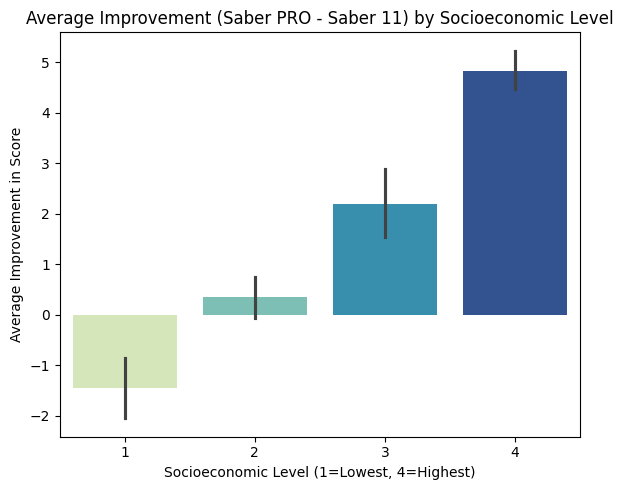

In [ ]:
df["IMPROVEMENT"] = df["PRO_AVG"] - df["S11_AVG"]

plt.figure(figsize=(6,5))
sns.barplot(
    x="SEL",
    y="IMPROVEMENT",
    data=df,
    palette="YlGnBu",
    errorbar=("ci", 95)
)
plt.title("Average Improvement (Saber PRO - Saber 11) by Socioeconomic Level")
plt.xlabel("Socioeconomic Level (1=Lowest, 4=Highest)")
plt.ylabel("Average Improvement in Score")
plt.tight_layout()
plt.show()

In [ ]:
model_imp = smf.ols("IMPROVEMENT ~ C(SEL)", data=df).fit()
aov_imp = anova_lm(model_imp, typ=2)
print(aov_imp)

                sum_sq       df           F        PR(>F)
C(SEL)    6.702345e+04      3.0  126.400212  1.370813e-80
Residual  2.088470e+06  11816.0         NaN           NaN


**Parental Education vs. Family Revenue: Which Matters More?**

In [ ]:
df["EDU_PARENTS_AVG"] = df[["EDU_FATHER_NUM", "EDU_MOTHER_NUM"]].mean(axis=1)

revenue_map = {
    "less than 1 LMMW": 1,
    "Between 1 and less than 2 LMMW": 2,
    "Between 2 and less than 3 LMMW": 3,
    "Between 3 and less than 5 LMMW": 4,
    "Between 5 and less than 7 LMMW": 5,
    "Between 7 and less than 10 LMMW": 6,
    "10 or more LMMW": 7
}

df["REVENUE_NUM"] = df["REVENUE"].map(revenue_map)

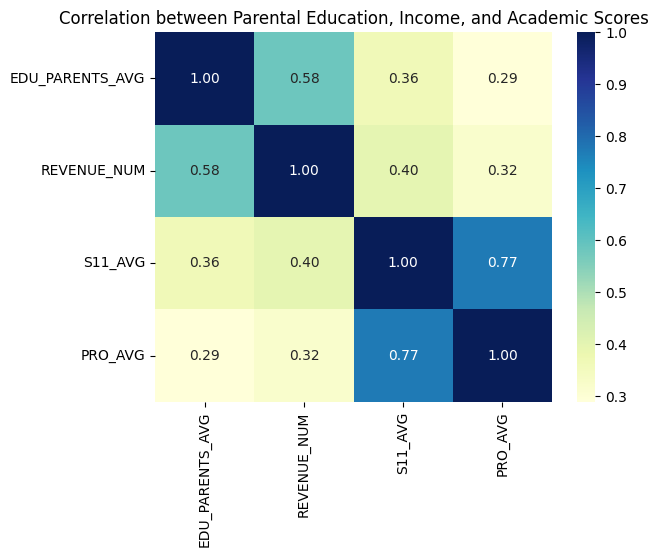

In [ ]:
sns.heatmap(df[["EDU_PARENTS_AVG","REVENUE_NUM","S11_AVG","PRO_AVG"]].corr(),
            annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation between Parental Education, Income, and Academic Scores")
plt.show()

**How does each gender perform in the global assessment?**

In [ ]:
print("====== Descriptive Statistics for Global Score by Gender ======")
desc = df.groupby("GENDER")["G_SC"].describe().round(2)
print(desc)
print()

====== Descriptive Statistics for Global Score by Gender ======
         count    mean    std   min    25%    50%    75%    max
GENDER                                                         
F       4806.0  161.51  22.48  76.0  146.0  162.0  178.0  242.0
M       7014.0  164.14  23.56  37.0  148.0  165.0  181.0  247.0



/tmp/ipython-input-3480010431.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


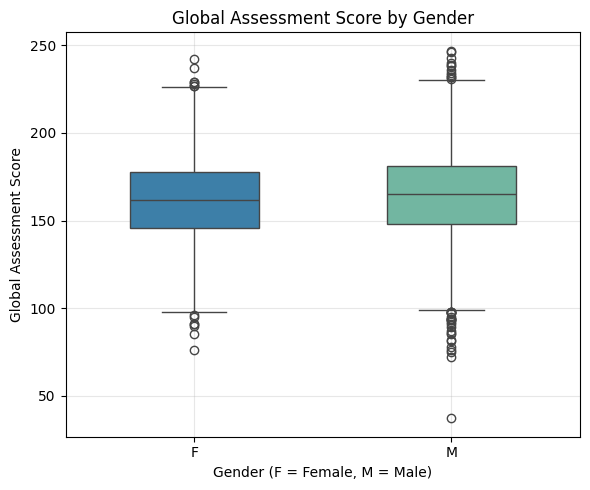

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(
    x="GENDER",
    y="G_SC",
    data=df,
    palette=["#2b83ba", "#66c2a5"],
    width=0.5
)
plt.title("Global Assessment Score by Gender")
plt.xlabel("Gender (F = Female, M = Male)")
plt.ylabel("Global Assessment Score")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
female_scores = df[df["GENDER"] == "F"]["G_SC"].dropna()
male_scores   = df[df["GENDER"] == "M"]["G_SC"].dropna()

t_stat, p_val = ttest_ind(female_scores, male_scores, equal_var=False)

print("="*20 + "Independent Samples t-test" + "="*20)
print(f"t = {t_stat:.3f}")
print(f"p = {p_val:.10f}")

if p_val < 0.05:
    print("→ There is a statistically significant difference in global scores between genders.")
else:
    print("→ No statistically significant difference found between genders.")

====================Independent Samples t-test====================
t = -6.114
p = 0.0000000010
→ There is a statistically significant difference in global scores between genders.
